# Introducción a Keras

<img src="figuras/keras-logo-2018-large-1200.png" width="75%">

[Keras](http://keras.io) es una API de redes neuronales de alto nivel, escrita en Python y capaz de ejecutarse sobre TensorFlow, CNTK o Theano. Fue desarrollado con un enfoque en permitir la experimentación rápida. Poder pasar de la idea al resultado con la menor demora posible es la clave para hacer una buena investigación.

Use Keras si necesita una biblioteca de aprendizaje profundo que:

- Permite la creación de prototipos fácil y rápida (a través de la facilidad de uso, la modularidad y la extensibilidad).
- Admite redes convolucionales y redes recurrentes, así como combinaciones de las dos.
- Se ejecuta sin problemas en la CPU y la GPU.

### Principios rectores

- **La facilidad de uso**. Keras es una API diseñada para seres humanos, no máquinas. Pone la experiencia del usuario al frente y al centro. Keras sigue las mejores prácticas para reducir la carga cognitiva: ofrece API consistentes y simples, minimiza el número de acciones de usuario requeridas para casos de uso común y proporciona comentarios claros y procesables ante el error del usuario.
- **Modularidad**. Un modelo se entiende como una secuencia o un gráfico de módulos independientes y completamente configurables que se pueden conectar con la menor cantidad de restricciones posible. En particular, las capas neuronales, las funciones de costos, los optimizadores, los esquemas de inicialización, las funciones de activación y los esquemas de regularización son todos módulos independientes que puede combinar para crear nuevos modelos.
- **Facilita la extensibilidad**. Los nuevos módulos son simples de agregar (como nuevas clases y funciones), y los módulos existentes brindan amplios ejemplos. Para poder crear fácilmente nuevos módulos permite una total expresividad, lo que hace que Keras sea adecuado para la investigación avanzada.
- **Trabaja con Python**. No hay archivos de configuración de modelos por separado en un formato declarativo. Los modelos se describen en el código de Python, que es compacto, más fácil de depurar y permite facilidad de extensión.

### Instalación

Antes de instalar Keras, instale uno de sus motores bases: TensorFlow, Theano o CNTK. Se recomienda TensorFlow.

Instalar Keras usando pip
```python
pip install keras
```

## Reconocimiento de los dígitos MNIST usando Keras

### Cargar el conjunto de datos MNIST en Keras

La biblioteca de aprendizaje profundo Keras proporciona un método conveniente para cargar el conjunto de datos MNIST.

El conjunto de datos se descarga automáticamente la primera vez que se llama a esta función y se almacena en su directorio de inicio en `~/.keras/datasets/mnist.pkl.gz` como un archivo de 15 MB.

Esto es muy útil para desarrollar y probar modelos de aprendizaje profundo.

Para demostrar lo fácil que es cargar el conjunto de datos de MNIST, primero escribiremos un pequeño script para descargar y visualizar las primeras 4 imágenes en el conjunto de datos de capacitación.

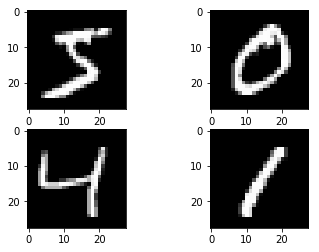

In [58]:
%matplotlib inline

# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# cargar (descargar si es necesario) el conjunto de datos MNIST 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# graficar 4 imágenes en escala de grices
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# mostrar el gráfico
plt.show()

### Modelo Base con un Perceptron Multicapa

¿Realmente necesitamos un modelo complejo como una red neuronal convolucional para obtener los mejores resultados con MNIST?

Puede obtener muy buenos resultados utilizando un modelo de red neuronal muy simple con una sola capa oculta. En esta sección crearemos un modelo de perceptrón multicapa simple que logre una tasa de error de 1.74%. Usaremos esto como línea de base para comparar modelos de redes neuronales convolucionales más complejos.

Comencemos importando las clases y funciones que necesitaremos.

In [60]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Siempre es una buena idea inicializar el generador de números aleatorios en una constante para garantizar que los resultados de su secuencia de comandos sean reproducibles.

In [62]:
# fijar la semilla del generador de números aleatorios para reproducibilidad
semilla = 7
numpy.random.seed(semilla)

Ahora podemos cargar el conjunto de datos MNIST utilizando la función auxiliar Keras.

In [63]:
# cargar los data
(X_entrenamiento, y_entrenamiento), (X_prueba, y_prueba) = mnist.load_data()

El conjunto de datos de entrenamiento está estructurado como una matriz tridimensional de instancia, ancho de imagen y altura de la imagen. Para un modelo de perceptrón multicapa, debemos reducir las imágenes a un vector de píxeles. En este caso, las imágenes de 28 × 28 serán de 784 píxeles.

Podemos hacer que esto se transforme fácilmente usando la función `reshape()` de NumPy. También podemos reducir nuestros requisitos de memoria forzando la precisión de los valores de píxel a 32 bits, la precisión predeterminada utilizada por Keras de todos modos.

In [64]:
# aplanar las imágenes de 28*28 a un vector de 784 por cada imagen
num_pixeles = X_entrenamiento.shape[1] * X_entrenamiento.shape[2]
X_entrenamiento = X_entrenamiento.reshape(X_train.shape[0], num_pixeles).astype('float32')
X_prueba = X_prueba.reshape(X_prueba.shape[0], num_pixeles).astype('float32')

Los valores de píxel son escala de grises entre 0 y 255. Casi siempre es una buena idea realizar algún escalamiento valores de entrada cuando se usan modelos de redes neuronales. Debido a que la escala es bien conocida y se comporta bien, podemos normalizar muy rápidamente los valores de píxel en el rango 0 y 1 dividiendo cada valor por el máximo de 255

In [65]:
# normalizar las entradas de 0-255 a 0-1
X_entrenamiento = X_entrenamiento / 255
X_prueba = X_prueba / 255

Finalmente, la variable de salida es un número entero de 0 a 9. Este es un problema de clasificación de clase múltiple. Como tal, es una buena práctica usar una codificación "one-hot" de los valores de clase, transformando el vector de los enteros de clase en una matriz binaria.

Podemos hacer esto fácilmente usando la función auxiliar integrada `np_utils.to_categorical()` en Keras.

In [66]:
# codificar salidas como "one hot"
y_entrenamiento = np_utils.to_categorical(y_entrenamiento)
y_prueba = np_utils.to_categorical(y_prueba)
num_clases = y_prueba.shape[1]

Ahora estamos listos para crear nuestro modelo de red neuronal simple. Definiremos nuestro modelo en una función. Esto es útil si desea extender el ejemplo más adelante e intentar obtener una mejor puntuación.

In [67]:
# definir modelo base
def modelo_base():
    # crear modelo
    modelo = Sequential()
    modelo.add(Dense(num_pixeles, input_dim=num_pixeles, kernel_initializer='normal', activation='relu'))
    modelo.add(Dense(num_clases, kernel_initializer='normal', activation='softmax'))
    # Compilar el modelo
    modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return modelo

El modelo es una red neuronal simple con una capa oculta con el mismo número de neuronas que entradas (784). Se usa una función de activación ReLU para las neuronas en la capa oculta.

Se usa una función de activación de softmax en la capa de salida para convertir las salidas en valores similares a la probabilidad y permitir que una clase de los 10 sea seleccionada como la predicción de salida del modelo. La pérdida logarítmica se usa como la función de pérdida (llamada `categórica_crossentropy` en Keras) y el algoritmo eficiente de descenso de gradiente ADAM se utiliza para aprender los pesos.

Ahora podemos ajustar y evaluar el modelo. El modelo se entrena sobre 10 épocas con actualizaciones cada 200 imágenes. Los datos de prueba se utilizan como el conjunto de datos de validación, lo que le permite ver la habilidad del modelo mientras se entrena. Un valor detallado de 2 se usa para reducir la salida a una línea para cada época de entrenamiento.

Finalmente, el conjunto de datos de prueba se usa para evaluar el modelo y se imprime una tasa de error de clasificación.

In [68]:
# construir el modelo
modelo = modelo_base()
# Entrenar el modelo
modelo.fit(X_entrenamiento, y_entrenamiento, validation_data=(X_prueba, y_prueba), epochs=10, batch_size=200, verbose=2)
# Evaluación final del modelo
puntuacion = modelo.evaluate(X_prueba, y_prueba, verbose=0)
print("Error PMC: %.2f%%" % (100-puntuacion[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2781 - acc: 0.9210 - val_loss: 0.1416 - val_acc: 0.9574
Epoch 2/10
 - 6s - loss: 0.1115 - acc: 0.9679 - val_loss: 0.0919 - val_acc: 0.9710
Epoch 3/10
 - 6s - loss: 0.0718 - acc: 0.9797 - val_loss: 0.0796 - val_acc: 0.9763
Epoch 4/10
 - 7s - loss: 0.0503 - acc: 0.9858 - val_loss: 0.0750 - val_acc: 0.9764
Epoch 5/10
 - 7s - loss: 0.0372 - acc: 0.9895 - val_loss: 0.0680 - val_acc: 0.9788
Epoch 6/10
 - 6s - loss: 0.0269 - acc: 0.9926 - val_loss: 0.0638 - val_acc: 0.9801
Epoch 7/10
 - 6s - loss: 0.0210 - acc: 0.9948 - val_loss: 0.0632 - val_acc: 0.9803
Epoch 8/10
 - 6s - loss: 0.0139 - acc: 0.9972 - val_loss: 0.0628 - val_acc: 0.9804
Epoch 9/10
 - 6s - loss: 0.0106 - acc: 0.9980 - val_loss: 0.0596 - val_acc: 0.9809
Epoch 10/10
 - 6s - loss: 0.0079 - acc: 0.9986 - val_loss: 0.0611 - val_acc: 0.9809
Error PMC: 1.91%


Ejecutar el ejemplo puede tomar unos minutos cuando se ejecuta en una CPU. Debería ver el resultado a continuación. Esta red muy simple definida en muy pocas líneas de código logra una tasa de error respetable de 1.91%.

## Red Neuronal Convolucional Sencilla para MNIST

Ahora que hemos visto cómo cargar el conjunto de datos MNIST y formar un modelo de perceptrón multicapa simple, es hora de desarrollar una red neuronal convolucional más sofisticada o un modelo CNN.

Keras proporciona mucha capacidad para crear redes neuronales convolucionales.

En esta sección crearemos una CNN simple para MNIST que demuestre cómo utilizar todos los aspectos de una implementación de CNN moderna, incluyendo capas convolucionales, capas de reducción y capas de deserción.

El primer paso es importar las clases y funciones necesarias.

In [69]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Siempre es una buena idea inicializar el generador de números aleatorios en una constante para garantizar que los resultados de su secuencia de comandos sean reproducibles.

In [70]:
# fijar la semilla del generador de números aleatorios para reproducibilidad
semilla = 7
numpy.random.seed(semilla)

A continuación, debemos cargar el conjunto de datos MNIST y remodelarlo para que sea adecuado para usarlos en el entrenamiento de una Red Neuronal Convolucional. En Keras, las capas utilizadas para convoluciones bidimensionales esperan valores de píxeles con las dimensiones [píxeles] [ancho] [altura].

En el caso de RGB, los píxeles de la primera dimensión serían 3 para los componentes rojo, verde y azul, y sería como tener 3 entradas de imagen para cada imagen en color. En el caso de MNIST donde los valores de píxel son escala de grises, la dimensión de píxel se establece en 1.

In [71]:
# cargar los data
(X_entrenamiento, y_entrenamiento), (X_prueba, y_prueba) = mnist.load_data()
# Remodelar para que sea: [ejemplos][pixeles][ancho][altura]
X_entrenamiento = X_entrenamiento.reshape(X_entrenamiento.shape[0], 1, 28, 28).astype('float32')
X_prueba = X_prueba.reshape(X_prueba.shape[0], 1, 28, 28).astype('float32')

Como antes, es una buena idea normalizar los valores de píxel en el rango 0 y 1 y uno codificar en caliente las variables de salida.

In [72]:
# normalizar las entradas de 0-255 a 0-1
X_entrenamiento = X_entrenamiento / 255
X_prueba = X_prueba / 255
# codificar salidas como "one hot"
y_entrenamiento = np_utils.to_categorical(y_entrenamiento)
y_prueba = np_utils.to_categorical(y_prueba)
num_clases = y_prueba.shape[1]

A continuación definimos nuestro modelo de red neuronal.

Las redes neuronales convolucionales son más complejas que los perceptrones multicapa estándar, por lo que comenzaremos por usar una estructura simple para empezar que utilice todos los elementos para obtener resultados de vanguardia. A continuación se resume la arquitectura de la red.

1. La primera capa oculta es una capa convolucional llamada Convolution2D. La capa tiene 32 mapas de características, que con el tamaño de 5 × 5 y una función de activación del rectificador. Esta es la capa de entrada, esperando imágenes con el esquema de estructura arriba [píxeles] [ancho] [alto].
2. A continuación, definimos una capa de agrupación que toma el máximo llamado MaxPooling2D. Está configurado con un tamaño de grupo de 2 × 2.
3. La siguiente capa es una capa de regularización que utiliza el apagado aleatorio. Está configurado para excluir aleatoriamente el 20% de las neuronas en la capa con el fin de reducir el sobreajuste.
4. La siguiente es una capa que convierte los datos de la matriz 2D a un vector llamado Flatten. Permite que la salida sea procesada por capas estándar totalmente conectadas.
5. A continuación, una capa completamente conectada con 128 neuronas y la función de activación del rectificador.
6. Finalmente, la capa de salida tiene 10 neuronas para las 10 clases y una función de activación de softmax para emitir predicciones de probabilidad para cada clase.

Como antes, el modelo se entrena usando pérdida logarítmica y el algoritmo de descenso de gradiente ADAM

In [73]:
def modelo_base():
    # crear modelo
    modelo = Sequential()
    modelo.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Dropout(0.2))
    modelo.add(Flatten())
    modelo.add(Dense(128, activation='relu'))
    modelo.add(Dense(num_clases, activation='softmax'))
    # Compilar modelo
    modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return modelo

Evaluamos el modelo de la misma manera que antes con el perceptrón multicapa. La CNN se etrena sobre 10 épocas con un tamaño de lote de 200.

In [74]:
# construir el modelo
modelo = modelo_base()
# Entrenar el modelo
modelo.fit(X_entrenamiento, y_entrenamiento, validation_data=(X_prueba, y_prueba), epochs=10, batch_size=200, verbose=2)
# Evaluación final del modelo
puntuacion = modelo.evaluate(X_prueba, y_prueba, verbose=0)
print("Error RNC: %.2f%%" % (100-puntuacion[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 127s - loss: 0.2320 - acc: 0.9342 - val_loss: 0.0812 - val_acc: 0.9748
Epoch 2/10
 - 127s - loss: 0.0737 - acc: 0.9782 - val_loss: 0.0469 - val_acc: 0.9839
Epoch 3/10
 - 128s - loss: 0.0532 - acc: 0.9839 - val_loss: 0.0432 - val_acc: 0.9863
Epoch 4/10
 - 129s - loss: 0.0401 - acc: 0.9880 - val_loss: 0.0400 - val_acc: 0.9868
Epoch 5/10
 - 130s - loss: 0.0334 - acc: 0.9894 - val_loss: 0.0345 - val_acc: 0.9882
Epoch 6/10
 - 131s - loss: 0.0273 - acc: 0.9917 - val_loss: 0.0307 - val_acc: 0.9898
Epoch 7/10
 - 128s - loss: 0.0230 - acc: 0.9929 - val_loss: 0.0342 - val_acc: 0.9883
Epoch 8/10
 - 135s - loss: 0.0200 - acc: 0.9937 - val_loss: 0.0313 - val_acc: 0.9897
Epoch 9/10
 - 136s - loss: 0.0167 - acc: 0.9946 - val_loss: 0.0310 - val_acc: 0.9899
Epoch 10/10
 - 135s - loss: 0.0138 - acc: 0.9959 - val_loss: 0.0334 - val_acc: 0.9893
Error RNC: 1.07%


Ejecutando el ejemplo, la precisión en la prueba de entrenamiento y validación se imprime en cada época y al final de la tasa de error de clasificación se imprime.

Las épocas pueden tardar unos 45 segundos en ejecutarse en la GPU (por ejemplo, en AWS). Puede ver que la red alcanza una tasa de error de 1.07, que es mejor que nuestro modelo de perceptrón multicapa simple anterior.

## Red Neuronal Convolucional Compleja para MNIST

Ahora que hemos visto cómo crear una CNN simple, echemos un vistazo a un modelo capaz de obtener resultados de última generación.

Importamos clases y funciones, luego cargamos y preparamos los datos de la misma manera que en el ejemplo anterior de CNN.

In [11]:
# Red Neuronal compleja para el conjunto de datos de MNIST
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fijar la semilla del generador de números aleatorios para reproducibilidad
semilla = 7
numpy.random.seed(semilla)
# cargar los data
(X_entrenamiento, y_entrenamiento), (X_prueba, y_prueba) = mnist.load_data()
# Remodelar para que sea: [ejemplos][pixeles][ancho][altura]
X_entrenamiento = X_entrenamiento.reshape(X_entrenamiento.shape[0], 1, 28, 28).astype('float32')
X_prueba = X_prueba.reshape(X_prueba.shape[0], 1, 28, 28).astype('float32')
# normalizar las entradas de 0-255 a 0-1
X_entrenamiento = X_entrenamiento / 255
X_prueba = X_prueba / 255
# codificar salidas como "one hot"
y_entrenamiento = np_utils.to_categorical(y_entrenamiento)
y_prueba = np_utils.to_categorical(y_prueba)
num_clases = y_prueba.shape[1]

Esta vez, definimos una gran arquitectura CNN con capas convolucionales adicionales, agrupaciones máximas y capas completamente conectadas. La topología de red se puede resumir de la siguiente manera.

1. Capa convolucional con 30 mapas de características de tamaño 5 × 5.
2. Combinando la capa tomando el máximo de 2 * 2 parches.
3. Capa convolucional con 15 mapas de características de tamaño 3 × 3.
4. Combinando la capa tomando el máximo de 2 * 2 parches.
5. Capa de deserción con una probabilidad del 20%.
6. Aplanar la capa.
7. Capa completamente conectada con 128 neuronas y activación del rectificador.
8. Capa completamente conectada con 50 neuronas y activación del rectificador.
9. Capa de salida

In [14]:
# define the larger model
def modelo_complejo():
    # crear modelo
    modelo = Sequential()
    modelo.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Conv2D(15, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))
    modelo.add(Dropout(0.2))
    modelo.add(Flatten())
    modelo.add(Dense(128, activation='relu'))
    modelo.add(Dense(50, activation='relu'))
    modelo.add(Dense(num_clases, activation='softmax'))
    # Compilar modelo
    modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return modelo

Evaluamos el modelo de la misma manera que antes con el perceptrón multicapa. La CNN se etrena sobre 10 épocas con un tamaño de lote de 200.

In [15]:
# construir el modelo
modelo = modelo_complejo()
# Entrenar el modelo
modelo.fit(X_entrenamiento, y_entrenamiento, validation_data=(X_prueba, y_prueba), epochs=10, batch_size=200, verbose=2)
# Evaluación final del modelo
puntuacion = modelo.evaluate(X_prueba, y_prueba, verbose=0)
print("Error RNC compleja: %.2f%%" % (100-puntuacion[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 127s - loss: 0.3901 - acc: 0.8757 - val_loss: 0.0804 - val_acc: 0.9755
Epoch 2/10
 - 179s - loss: 0.0979 - acc: 0.9692 - val_loss: 0.0506 - val_acc: 0.9854
Epoch 3/10
 - 185s - loss: 0.0721 - acc: 0.9778 - val_loss: 0.0365 - val_acc: 0.9889
Epoch 4/10
 - 191s - loss: 0.0593 - acc: 0.9818 - val_loss: 0.0338 - val_acc: 0.9890
Epoch 5/10
 - 173s - loss: 0.0476 - acc: 0.9851 - val_loss: 0.0308 - val_acc: 0.9900
Epoch 6/10
 - 175s - loss: 0.0437 - acc: 0.9865 - val_loss: 0.0289 - val_acc: 0.9899
Epoch 7/10
 - 176s - loss: 0.0373 - acc: 0.9880 - val_loss: 0.0304 - val_acc: 0.9904
Epoch 8/10
 - 175s - loss: 0.0337 - acc: 0.9892 - val_loss: 0.0254 - val_acc: 0.9907
Epoch 9/10
 - 175s - loss: 0.0314 - acc: 0.9905 - val_loss: 0.0251 - val_acc: 0.9916
Epoch 10/10
 - 171s - loss: 0.0289 - acc: 0.9908 - val_loss: 0.0275 - val_acc: 0.9911
Error RNC compleja: 0.89%


Al ejecutar el ejemplo, se imprime la precisión en los conjuntos de datos de capacitación y validación de cada época y una tasa de error de clasificación final.

El modelo tarda aproximadamente 100 segundos en ejecutarse por época. Este modelo un poco más grande logra la tasa de error de clasificación respetable de 0,89%.